# BITCOIN PREDICTION USING TWITTER TWEETS

<div><img src='attachment:image.png' width="500"></div>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import time
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91805\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Data introduction


In [ ]:
# import the text files
df1 = pd.read_csv('cleaned_tweets_elon_bitcoin.csv',index_col=0)
df2 = pd.read_csv('cleaned_tweets_binance_bitcoin.csv',index_col=0)
df3 = pd.read_csv('cleaned_tweets_SBF_FTX_bitcoin.csv',index_col=0)
df4 = pd.read_csv("cleaned_tweets_cz_binance_Bitcoin.csv",index_col=0)

In [ ]:
#import the numerical files
num_data = pd.read_csv('BTC-USD.csv')

In [ ]:
num_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...,...
1396,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910
1397,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645
1398,2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556
1399,2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815


In [ ]:
# combining the all text files
df = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [ ]:
df

,Date,User,tweet_text
0,2022-05-01 06:51:38+00:00,elonmusk,Haha he says “Bitcoin” so many times
1,2022-03-14 04:11:38+00:00,elonmusk,"As a general principle, for those looking fo..."
2,2021-11-20 06:20:16+00:00,elonmusk,Bitcoin cures cancer
3,2021-10-24 18:01:32+00:00,elonmusk,"Out of curiosity, I acquired some ascii ha..."
4,2021-10-24 17:51:57+00:00,elonmusk,Possibly. Bitcoin was conceived at a t...
...,...,...,...
1173,2019-03-26 09:10:33+00:00,cz_binance,I find it interesting most non-bitcoiners thin...
1174,2019-03-11 05:16:43+00:00,cz_binance,The world's first live property auction using ...
1175,2019-03-10 10:37:05+00:00,cz_binance,"Not everyone uses USD, yet it has value. We d..."
1176,2019-03-02 10:39:58+00:00,cz_binance,"alright, let's put Tesla on hold for a bit, I ..."


In [ ]:
#concatination date of formate "2022-03-14 04:11:38+00:00" to "2022-03-14	"
df['Date'] = df['Date'].apply(lambda x: x[0:10])

In [ ]:
df

,Date,User,tweet_text
0,2022-05-01,elonmusk,Haha he says “Bitcoin” so many times
1,2022-03-14,elonmusk,"As a general principle, for those looking fo..."
2,2021-11-20,elonmusk,Bitcoin cures cancer
3,2021-10-24,elonmusk,"Out of curiosity, I acquired some ascii ha..."
4,2021-10-24,elonmusk,Possibly. Bitcoin was conceived at a t...
...,...,...,...
1173,2019-03-26,cz_binance,I find it interesting most non-bitcoiners thin...
1174,2019-03-11,cz_binance,The world's first live property auction using ...
1175,2019-03-10,cz_binance,"Not everyone uses USD, yet it has value. We d..."
1176,2019-03-02,cz_binance,"alright, let's put Tesla on hold for a bit, I ..."


In [ ]:
#converting date in str datatype to datatime datatype
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format = True)
df.sort_values(by = 'Date', ascending = True, inplace = True) #ascending order wrt date
# combining numerical data
num_data =pd.concat([num_data],ignore_index=True)
num_data['Date'] = pd.to_datetime(num_data.Date, infer_datetime_format = True)#converting date in str datatype to datatime datatype
num_data.sort_values(by = 'Date', ascending = True, inplace = True)#ascending order wrt date
#reseting the index
num_data = num_data.reset_index(drop=True)
final = pd.merge(df, num_data,on='Date',how='left')

In [ ]:
final

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume
0,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649
1,2019-02-24,binance,"""As early as March 2018, it was estimated that...",4145.458008,4210.641602,3793.708984,3810.427490,3810.427490,10794227451
2,2019-03-02,cz_binance,"alright, let's put Tesla on hold for a bit, I ...",3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
3,2019-03-10,cz_binance,"Not everyone uses USD, yet it has value. We d...",3966.174316,3966.174316,3924.381104,3951.599854,3951.599854,9713267607
4,2019-03-11,cz_binance,The world's first live property auction using ...,3953.740234,3966.384766,3889.239014,3905.227295,3905.227295,10125901903
...,...,...,...,...,...,...,...,...,...
1173,2022-10-09,binance,You might have heard a lot about ’s hash rate...,19417.478516,19542.539063,19349.259766,19446.425781,19446.425781,16837262532
1174,2022-10-14,cz_binance,"In a conversation today: ""you know dropped f...",19382.533203,19889.146484,19115.408203,19185.656250,19185.656250,38452356727
1175,2022-10-18,binance,"Matt Price, Head of Intelligence and Investi...",19550.466797,19666.994141,19144.769531,19334.416016,19334.416016,30580012344
1176,2022-10-21,binance,Have you shown your support today? The power i...,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866


In [ ]:
#droping out null values
final = final.dropna()
final = final.reset_index(drop=True)
org_data = final

In [ ]:
def cleanRT(text):
    text = re.sub(r'RT[\s]+', '', text) # Remove RT
    return text

def cleanURLExcessMentions(text):
    text = re.sub(r'https?://[A-Za-z0-9.]+', '', text) # Remove hyperlink
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # Remove the '#' symbol
    text = re.sub(r'$[A-Za-z0-9_]+', '', text) # Remove the '$' symbol
    return text

def cleanOtherSymbol(text):
    text = re.sub(r'[$&()!?:.]', '', text) # Remove the symbols
    text = re.sub(r'\n', '', text) # Remove additional symbols
    return text

## Types of Sentiment Analysis
![image.png](attachment:image.png)

In [ ]:
# Cleaning the text
final["tweet_text"] = final['tweet_text'].apply(cleanRT)
final["tweet_text"] = final['tweet_text'].apply(cleanURLExcessMentions)
final["tweet_text"] = final['tweet_text'].apply(cleanOtherSymbol)
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume
0,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649
1,2019-02-24,binance,"""As early as March 2018, it was estimated that...",4145.458008,4210.641602,3793.708984,3810.427490,3810.427490,10794227451
2,2019-03-02,cz_binance,"alright, let's put Tesla on hold for a bit, I ...",3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
3,2019-03-10,cz_binance,"Not everyone uses USD, yet it has value We do...",3966.174316,3966.174316,3924.381104,3951.599854,3951.599854,9713267607
4,2019-03-11,cz_binance,The world's first live property auction using ...,3953.740234,3966.384766,3889.239014,3905.227295,3905.227295,10125901903


In [ ]:
# Create a function to compute the negative, neutral, and positive analysis using vader
final['scores'] = final['tweet_text'].apply(lambda text: sid.polarity_scores(text))
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume,scores
0,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."
1,2019-02-24,binance,"""As early as March 2018, it was estimated that...",4145.458008,4210.641602,3793.708984,3810.427490,3810.427490,10794227451,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2019-03-02,cz_binance,"alright, let's put Tesla on hold for a bit, I ...",3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp..."
3,2019-03-10,cz_binance,"Not everyone uses USD, yet it has value We do...",3966.174316,3966.174316,3924.381104,3951.599854,3951.599854,9713267607,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp..."
4,2019-03-11,cz_binance,The world's first live property auction using ...,3953.740234,3966.384766,3889.239014,3905.227295,3905.227295,10125901903,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."


In [ ]:
# Create compounded score of the initial neg, neu, and pos data
final['compound'] = final['scores'].apply(lambda score_dict: score_dict['compound'])
final['sentiment_type'] = ''
final.loc[final.compound > 0, 'sentiment_type'] = 'POSITIVE'
final.loc[final.compound == 0, 'sentiment_type'] = 'NEUTRAL'
final.loc[final.compound < 0, 'sentiment_type'] = 'NEGATIVE'
final.head()

,Date,User,tweet_text,Open,High,Low,Close,Adj Close,Volume,scores,compound,sentiment_type
0,2019-01-23,cz_binance,"Chance encounters, bumps into on airplane fi...",3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.8658,POSITIVE
1,2019-02-24,binance,"""As early as March 2018, it was estimated that...",4145.458008,4210.641602,3793.708984,3810.427490,3810.427490,10794227451,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,2019-03-02,cz_binance,"alright, let's put Tesla on hold for a bit, I ...",3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...",0.2500,POSITIVE
3,2019-03-10,cz_binance,"Not everyone uses USD, yet it has value We do...",3966.174316,3966.174316,3924.381104,3951.599854,3951.599854,9713267607,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.5859,POSITIVE
4,2019-03-11,cz_binance,The world's first live property auction using ...,3953.740234,3966.384766,3889.239014,3905.227295,3905.227295,10125901903,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.3818,POSITIVE


In [ ]:
#droping unneccesary columns
final = final.drop(['User',"Date","scores","tweet_text","sentiment_type"], axis=1)

In [ ]:
#moving close column at last
final.insert(len(final.columns)-1, 'Close', final.pop('Close'))

In [ ]:
final

,Open,High,Low,Adj Close,Volume,compound,Close
0,3605.557129,3623.067871,3565.313965,3585.123047,5433755649,0.8658,3585.123047
1,4145.458008,4210.641602,3793.708984,3810.427490,10794227451,0.0000,3810.427490
2,3855.318115,3874.607422,3832.127930,3864.415039,7578786076,0.2500,3864.415039
3,3966.174316,3966.174316,3924.381104,3951.599854,9713267607,0.5859,3951.599854
4,3953.740234,3966.384766,3889.239014,3905.227295,10125901903,0.3818,3905.227295
...,...,...,...,...,...,...,...
1173,19417.478516,19542.539063,19349.259766,19446.425781,16837262532,0.1081,19446.425781
1174,19382.533203,19889.146484,19115.408203,19185.656250,38452356727,0.0000,19185.656250
1175,19550.466797,19666.994141,19144.769531,19334.416016,30580012344,0.2732,19334.416016
1176,19053.203125,19237.384766,18770.970703,19172.468750,32459287866,0.7845,19172.468750


## DATA PREPROCESSING

In [ ]:
# Check for missing values
missing_values = final.isnull().sum()
print(missing_values)

Open         0
High         0
Low          0
Adj Close    0
Volume       0
compound     0
Close        0
dtype: int64


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1178 non-null   float64
 1   High       1178 non-null   float64
 2   Low        1178 non-null   float64
 3   Adj Close  1178 non-null   float64
 4   Volume     1178 non-null   int64  
 5   compound   1178 non-null   float64
 6   Close      1178 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.5 KB


In [ ]:
final.describe()

,Open,High,Low,Adj Close,Volume,compound,Close
count,1178.000000,1178.000000,1178.000000,1178.000000,1.178000e+03,1178.000000,1178.000000
mean,29622.188393,30673.564105,28748.627847,29899.288421,4.272334e+10,0.155270,29899.288421
std,17327.234308,17898.282826,16801.500288,17471.960841,2.308552e+10,0.347503,17471.960841
min,3605.557129,3623.067871,3565.313965,3585.123047,5.433756e+09,-0.910000,3585.123047
25%,11547.099609,11819.854492,11339.465576,11617.316406,2.794908e+10,0.000000,11617.316406
50%,29432.472656,31129.939453,29091.181641,30214.355469,3.831488e+10,0.000000,30214.355469
75%,44682.750977,46598.679688,43232.968750,45577.771485,5.395251e+10,0.421500,45577.771485
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.961800,67566.828125


## Box Plot

A boxplot is a graph that gives a visual indication of how a data set's 25th percentile, 50th percentile, 75th percentile, minimum, maximum and outlier values are spread out and compare to each other.

Minimum: Q1 - 1.5*IQR

Maximum: Q3 + 1.5*IQR

IQR = Q3 - Q1

Open
Skew : 0.24


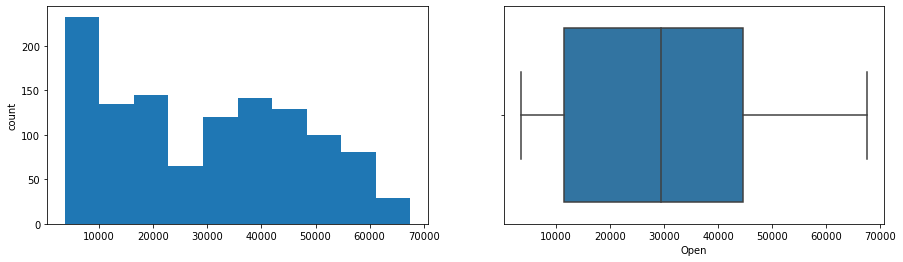

High
Skew : 0.21


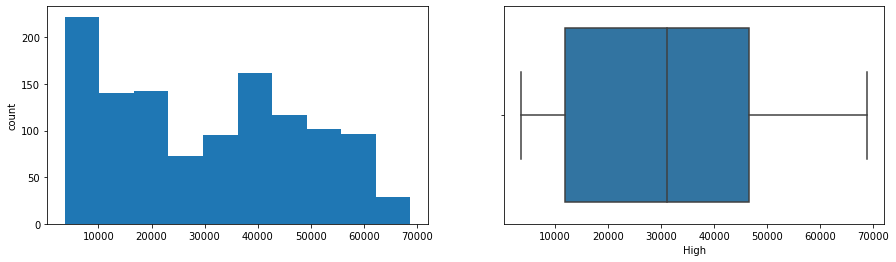

Low
Skew : 0.26


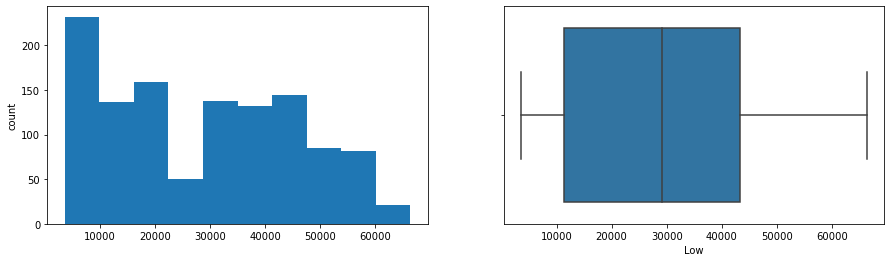

Adj Close
Skew : 0.23


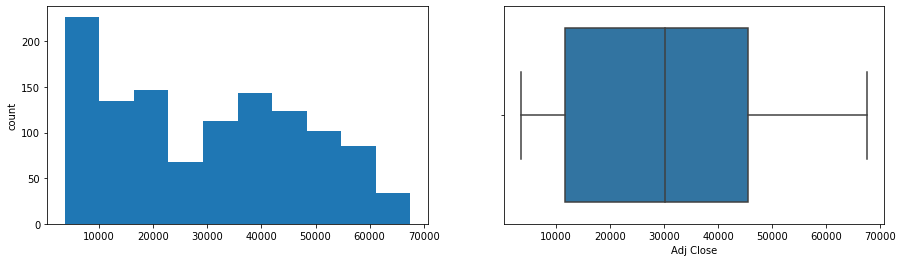

Volume
Skew : 4.57


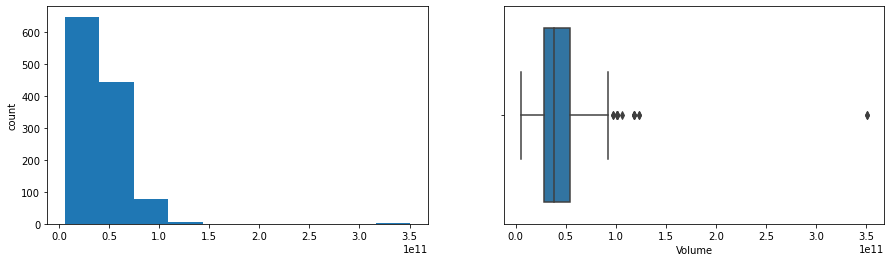

compound
Skew : 0.18


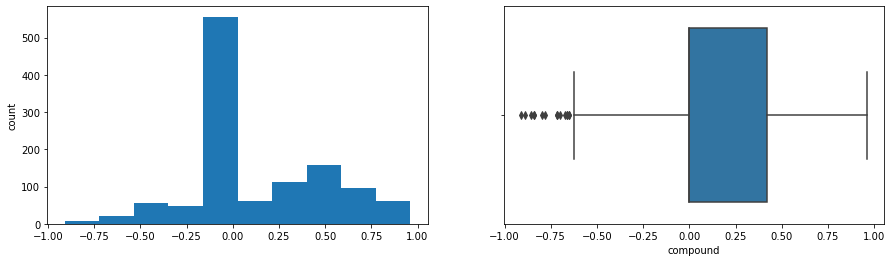

Close
Skew : 0.23


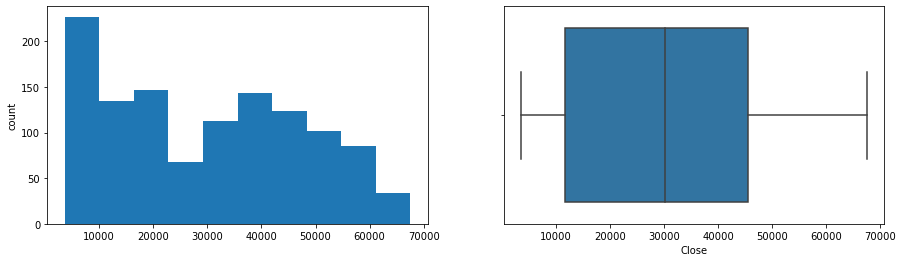

In [ ]:
import seaborn as sns
for col in final:
    print(col)
    print('Skew :', round(final[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    final[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=final[col])
    plt.show()

In [ ]:
# Assuming you have a DataFrame named 'df'
feature_name = 'Volume'  # Replace with the actual feature name

# Select the three highest values for the specified feature
top_three_highest = final[feature_name].nlargest(7)

# Drop the rows containing those values from the DataFrame
final = final.drop(top_three_highest.index)

In [ ]:
# Assuming you have a DataFrame named 'df'
feature_name = 'compound'  # Replace with the actual feature name

# Select the three lowest values for the specified feature
bottom_three_lowest = final[feature_name].nsmallest(7)

# Drop the rows containing those values from the DataFrame
final = final.drop(bottom_three_lowest.index)

Open
Skew : 0.25


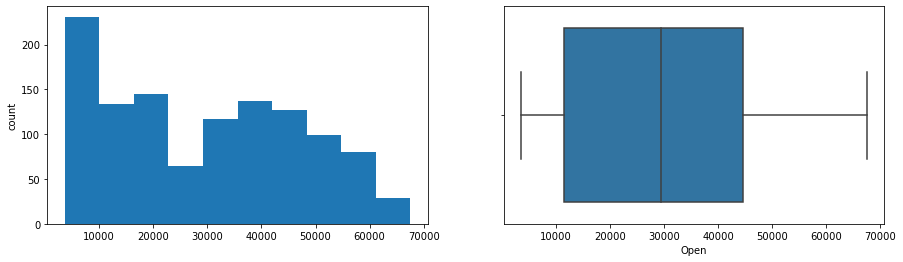

High
Skew : 0.22


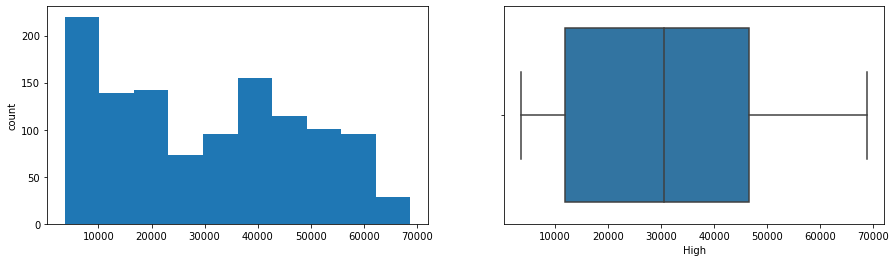

Low
Skew : 0.27


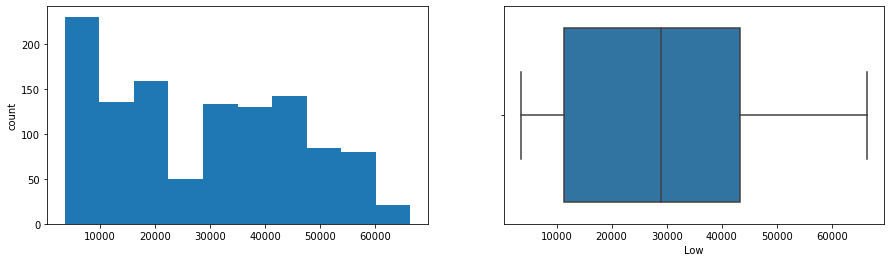

Adj Close
Skew : 0.24


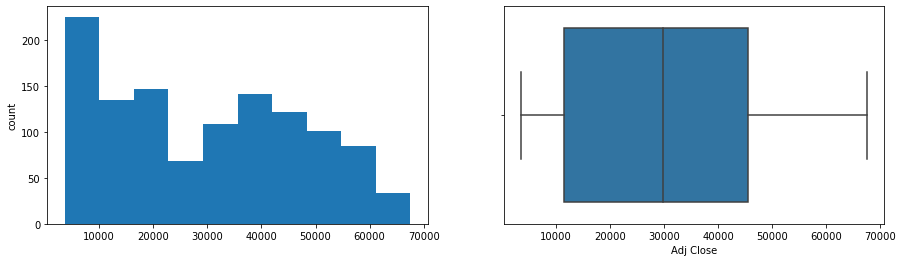

Volume
Skew : 0.81


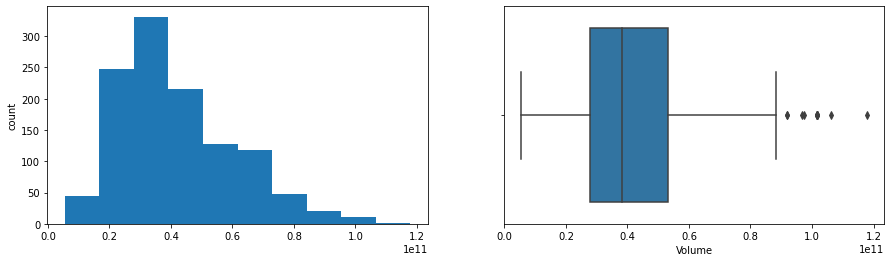

compound
Skew : 0.3


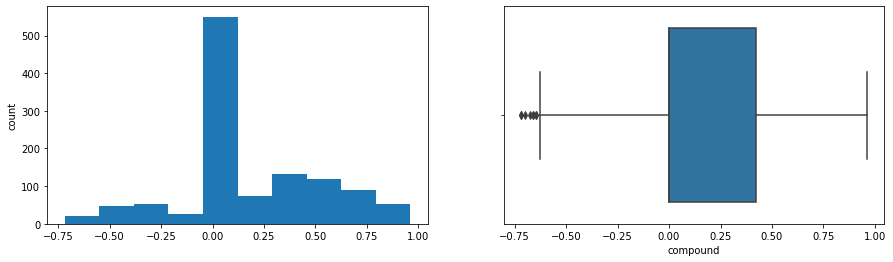

Close
Skew : 0.24


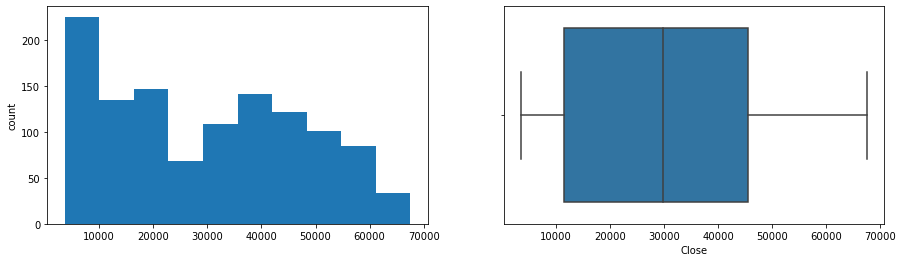

In [ ]:
import seaborn as sns
for col in final:
    print(col)
    print('Skew :', round(final[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    final[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)

    sns.boxplot(x=final[col])
    plt.show()

## Correlation

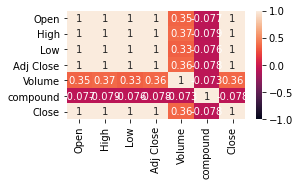

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(final.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

<Figure size 864x1224 with 0 Axes>

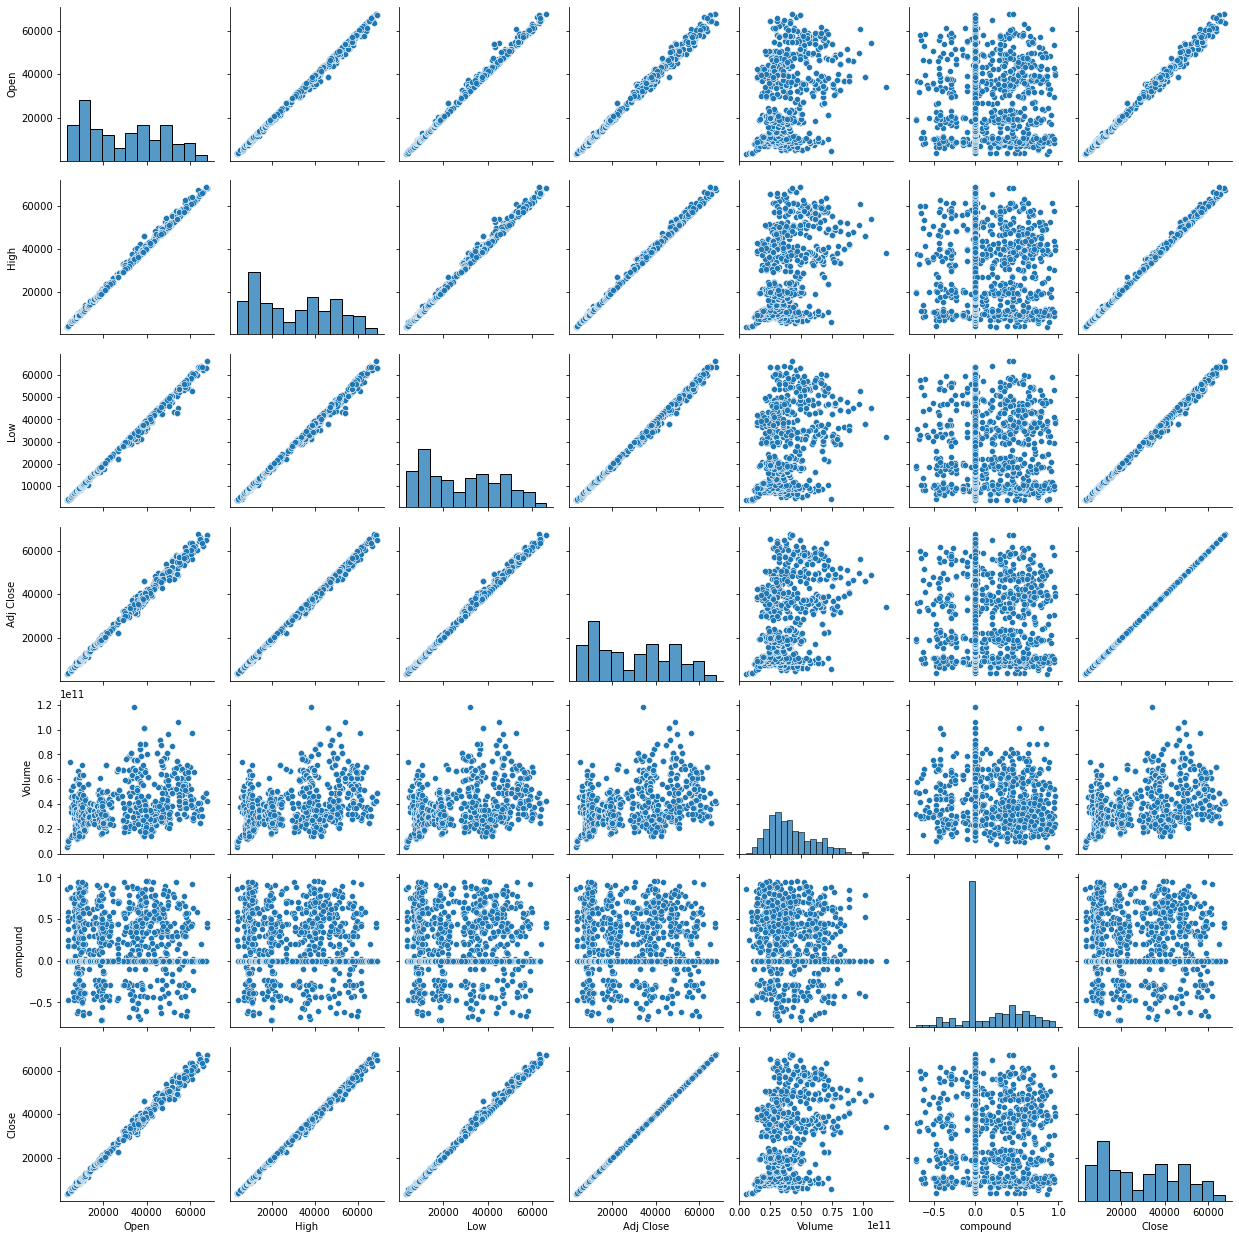

In [ ]:
plt.figure(figsize=(12,17))
sns.pairplot(data=final)
plt.show()

In [ ]:
final["Date"] = org_data['Date']

In [ ]:
final = final.dropna()

In [ ]:
Date = final["Date"]
#droping unneccesary columns
final = final.drop(["Date"], axis=1)

In [ ]:
x=final.iloc[:,:-1].values
y=final.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [ ]:
#Scaling the values
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train=x_sc.fit_transform(x_train)
X_test=x_sc.transform(x_test)

In [ ]:
y_train = y_train.reshape(-1,1)#converting 1d to2d
y_test = y_test.reshape(-1,1)#converting 1d to2d
#Scaling the values
y_sc = StandardScaler()
Y_train = y_sc.fit_transform(y_train)
Y_test = y_sc.transform(y_test)

# Linear Regression

<table><tr><td><img src='attachment:image-2.png'></td></tr><tr><td><img src='attachment:image.png' width="500"></td><td><img src='attachment:image-5.png'></td></tr></table>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Create and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
predictions = linear_reg.predict(X_test)

# Evaluate the model
X_train_pred = y_sc.inverse_transform(linear_reg.predict(X_train).reshape(-1,1))
pred_data = y_sc.inverse_transform(predictions.reshape(-1,1))


In [ ]:
import math
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

<table><tr><td><img src='attachment:image.png'></td><td><img src='attachment:image-2.png'></td></tr></table>

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 614560516.12 RMSE
Test Score: 587607605.96 RMSE
Train Score: 530536905.37 MAE
Test Score: 506429212.43 MAE


# Ridge Regression
![image.png](attachment:image.png)

### Lasso Regression
![image-2.png](attachment:image-2.png)

In [ ]:
from sklearn.linear_model import Ridge

# Create and train the model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_reg.fit(X_train, y_train)

# Make predictions
predictions = ridge_reg.predict(X_test)

# Evaluate the model
X_train_pred = y_sc.inverse_transform(ridge_reg.predict(X_train).reshape(-1,1))
pred_data = y_sc.inverse_transform(predictions.reshape(-1,1))


In [ ]:
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 614455225.91 RMSE
Test Score: 588029035.78 RMSE
Train Score: 530536905.37 MAE
Test Score: 506759810.77 MAE


![image.png](attachment:image.png)

![image.png](attachment:image.png)

# Random Forest Regression
![image.png](attachment:image.png)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters
random_forest_reg.fit(X_train, y_train)

# Make predictions
predictions = random_forest_reg.predict(X_test)

# Evaluate the model
# Evaluate the model
X_train_pred = y_sc.inverse_transform(random_forest_reg.predict(X_train).reshape(-1,1))
pred_data = y_sc.inverse_transform(predictions.reshape(-1,1))


<ipython-input-41-c2b470f29f4c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


In [ ]:
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 614580378.75 RMSE
Test Score: 587835282.02 RMSE
Train Score: 530566998.42 MAE
Test Score: 506574583.36 MAE


# XGBoost Regression
![image.png](attachment:image.png)


In [ ]:
from xgboost import XGBRegressor

# Create and train the model
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust parameters
xgb_reg.fit(X_train, y_train)

# Make predictions
predictions = xgb_reg.predict(X_test)

# Evaluate the model
X_train_pred = y_sc.inverse_transform(xgb_reg.predict(X_train).reshape(-1,1))
pred_data = y_sc.inverse_transform(predictions.reshape(-1,1))

In [ ]:
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 614527233.36 RMSE
Test Score: 587599214.05 RMSE
Train Score: 530515211.86 MAE
Test Score: 506387770.59 MAE


# LSTM(Long Short Term Memory)
<table><tr><td><img src='attachment:image.png'></td><td><img src='attachment:image-2.png'></td></tr></table>

![image.png](attachment:image.png)

In [ ]:
##change the number of units  for different outputs ##
layer_units=[50,100]
window_size = 6
dropouts=[0.2,0.2]

In [ ]:
model = Sequential()
# hidden layer 1
model.add(LSTM(layer_units[0], input_shape=(window_size,1), return_sequences=True))
model.add(Dropout(dropouts[0]))

# hidden layer 2
model.add(LSTM(layer_units[1]))
model.add(Dropout(dropouts[1]))

# output layer
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop")


In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,verbose=0)]# for early stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=32,verbose=1,validation_split=0.05,callbacks=callbacks)

Epoch 1/20
28/28 [==============================] - 5s 39ms/step - loss: 0.1292 - val_loss: 0.0187
Epoch 2/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0174 - val_loss: 0.0188
Epoch 3/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0188 - val_loss: 0.0153
Epoch 4/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0175 - val_loss: 0.0316
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 0.0105
Epoch 6/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0156 - val_loss: 0.0080
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0118 - val_loss: 0.0101
Epoch 8/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0148 - val_loss: 0.0083


In [ ]:
history.history['loss']

[0.12919646501541138,
 0.017382454127073288,
 0.018817106261849403,
 0.01747063919901848,
 0.016272785142064095,
 0.01556511502712965,
 0.01175210066139698,
 0.014777161180973053]

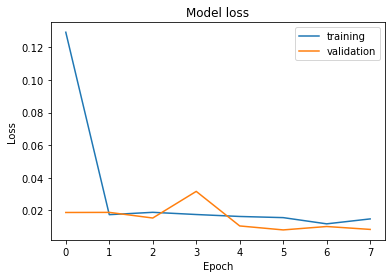

In [ ]:
#ploting the graph b/w epoch and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
#predict x_test values
predicted_data = model.predict(X_test)
#transforming to the original values
pred_data = y_sc.inverse_transform(predicted_data)
#predict x_train values
X_train_pred = y_sc.inverse_transform(model.predict(X_train))

30/30 [==============================] - 0s 3ms/step


In [ ]:
import math
# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(y_train, X_train_pred))
testScore_RMSE = math.sqrt(mean_squared_error(y_test, pred_data))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(y_train - X_train_pred))/len(y_train)
testScore_MAE = np.sum(np.absolute(y_test - pred_data))/len(y_test)

In [ ]:
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

Train Score: 1394.91 RMSE
Test Score: 1253.71 RMSE
Train Score: 1066.82 MAE
Test Score: 962.66 MAE


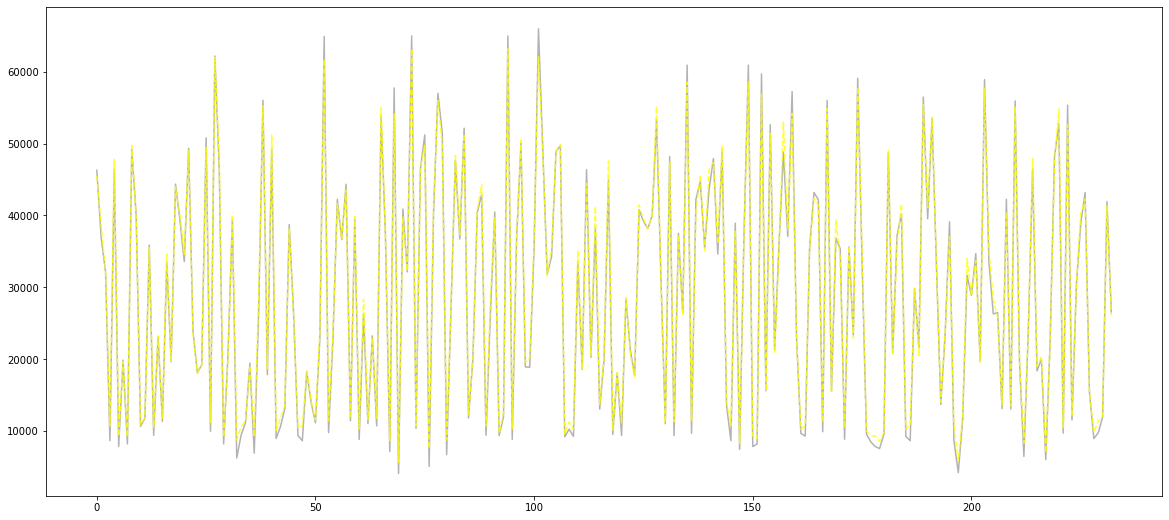

In [ ]:
def plot_reg_results(predicted_data, true_data, prediction_len=3):
    fig = plt.figure(facecolor='white', figsize=(20, 9))
    ax = fig.add_subplot(111)

    # plot actual data
    ax.plot(true_data,
            label='True Data',
            c='black',alpha=0.3)

    # plot flattened data
    plt.plot(np.array(predicted_data).flatten(),
             label='Prediction_full',
             c='yellow',linestyle='--',alpha=0.8)
    plt.show()



plot_reg_results(pred_data,y_test,prediction_len=3)

In [ ]:
time_df = pd.DataFrame(Date) # extracting date values
df1 = pd.DataFrame(X_train_pred,columns=['Train'])# placing predicted train values
df2 = pd.DataFrame(pred_data,columns=['Test'])# placing predicted test values
df2.index = df2.index + len(df1)
actual = list(y_train.flatten()) +list(y_test.flatten())# exatracting actual train and test values
time_df['Actual'] = actual
time_df2 = pd.concat([time_df, df1, df2], axis=1)# combining all dat

Text(0.5, 1.0, 'Bitcoin Price Prediction')

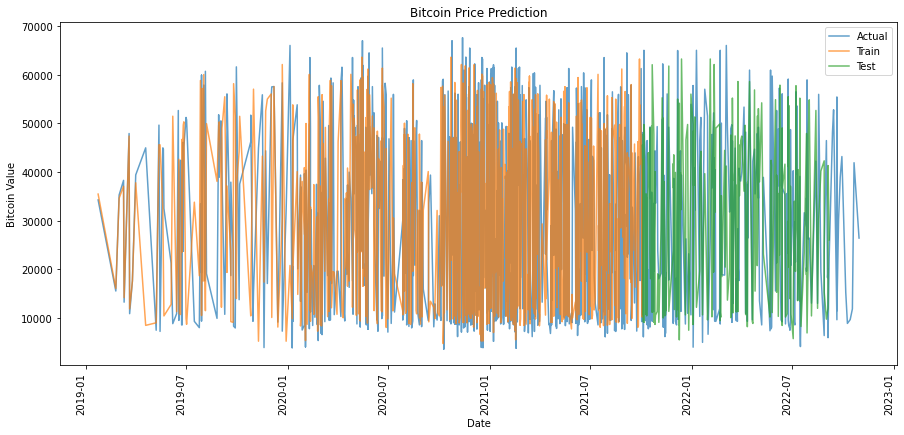

In [ ]:
time_df2.set_index('Date',inplace=True)
# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')

In [ ]:
final

,Open,High,Low,Adj Close,Volume,compound,Close
0,3605.557129,3623.067871,3565.313965,3585.123047,5433755649,0.8658,3585.123047
1,4145.458008,4210.641602,3793.708984,3810.427490,10794227451,0.0000,3810.427490
2,3855.318115,3874.607422,3832.127930,3864.415039,7578786076,0.2500,3864.415039
3,3966.174316,3966.174316,3924.381104,3951.599854,9713267607,0.5859,3951.599854
4,3953.740234,3966.384766,3889.239014,3905.227295,10125901903,0.3818,3905.227295
...,...,...,...,...,...,...,...
1173,19417.478516,19542.539063,19349.259766,19446.425781,16837262532,0.1081,19446.425781
1174,19382.533203,19889.146484,19115.408203,19185.656250,38452356727,0.0000,19185.656250
1175,19550.466797,19666.994141,19144.769531,19334.416016,30580012344,0.2732,19334.416016
1176,19053.203125,19237.384766,18770.970703,19172.468750,32459287866,0.7845,19172.468750


In [ ]:
tweet = "Bitcoin's 5 year performance is better than the S&P 500's 30 year performance."

In [ ]:
tweet = cleanRT(tweet)
tweet = cleanURLExcessMentions(tweet)
tweet = cleanOtherSymbol(tweet)

In [ ]:
tweet

"Bitcoin's 5 year performance is better than the SP 500's 30 year performance"

In [ ]:
compound = sid.polarity_scores(tweet)['compound']

In [ ]:
compound

0.4404

In [ ]:
import numpy as np

# Sample array of strings
string_array = np.array([[39978.63,42108.59,39978.63,41494.66, 36263739392,0.4404]])
Scaled_test = x_sc.transform(string_array)
print(Scaled_test)

[[ 0.58405662  0.62361225  0.65172025  0.64567833 -0.31543249  0.80541043]]


In [ ]:
y_sc.inverse_transform(model.predict(Scaled_test))

1/1 [==============================] - 0s 25ms/step


array([[40706.67]], dtype=float32)